In [353]:
# sorgt dafür, dass, wenn die letzte Zeile eine Zuweisung ist, deren Ergebnis auch ausgegeben wird
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [354]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import scipy as sc
import copy
import math

def show_book(figname, saveandshow=True, printflag=True, txt="", **kwargs):
    """
    Diese Funktion dient dazu Abbildungen abzuspeichern und den Name der Abbildung
    mit in den Quelltextschnipsel einzufügen
    """
    if printflag:
        print(r"Siehe Abbildung §\ref{fig_XXX}§".replace("XXX", figname) + txt)
    if saveandshow:
        plt.savefig(f"{figname}_snip.pdf",**kwargs)
        plt.show()
    
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 18


plt.rcParams['figure.subplot.left'] = .13

# Bisherige Plot-Einstellungen speichern (echte Kopie anlegen)
orig_plt_rcParams = copy.deepcopy(plt.rcParams)

# Plot-Einstellungen anpassen für zwei Grafiken nebeneinander
plt.rcParams['font.size'] = 18

plt.rcParams['figure.subplot.bottom'] = .265
plt.rcParams['figure.subplot.left'] = .20
plt.rcParams['figure.subplot.top'] = .995
plt.rcParams['figure.subplot.right'] = .995

plt.rcParams['figure.subplot.hspace'] = .3 # horizontalen Abstand anpassen


double_plt_rcParams = copy.deepcopy(plt.rcParams)
pass

`begin bytes1`

In [355]:
z = ord("C") # Zeichen in Zahl umwandeln

67

In [356]:
# Zahl in Binärdarstellung (als str) umwandeln.
s = bin(z)

'0b1000011'

In [357]:
# "0b" macht deutlich, dass es sich um eine Binärzahl handelt.
# Führende Nullen werden nicht dargestellt, deshalb 7 Zeichen


In [358]:
# String in Zahl umwandeln; explizit vorgegebene Basis 2
# ermöglicht Interpretation von Binärzahlen
z = int("1000011", base=2)

67

In [359]:
chr(z) # Zahl in Zeichen umwandeln

'C'

`end bytes1`

`begin bytes2`

In [360]:
S = "Hällo Wörld!"
B = S.encode("utf-8") # Umwandlung: str -> bytes

b'H\xc3\xa4llo W\xc3\xb6rld!'

In [361]:
len(S) # Anzahl an Zeichen

12

In [362]:
# in b werden alle Nicht-ASCII-Zeichen durch
# 2 Byte dargestellt.
len(B) # Anzahl an Bytes

14

In [363]:
# Bytes mit einem Entsprechungswert >128 lassen sich nicht direkt darstellen. In solchen Fällen verwendet Python Escape-Sequenzen, die mit \x beginnen, gefolgt von einer zweistelligen Hexadezimalzal

B[1:3] # utf-8-Repräsentation des "ä" durch 2 Byte

b'\xc3\xa4'

In [364]:
B.decode("utf-8") # Umwandlung: bytes -> str

'Hällo Wörld!'

`end bytes2`

`begin bytes3`

In [365]:
x = b"Hallo"

b'Hallo'

In [366]:
type(x)

bytes

`end bytes3`

`begin bytes4`

In [367]:
# Interpretation von bytes-Objekten als Zahlen und umgekehrt:
y = b'H\xc3\xa4llo'
y[0] # Zugriff auf einzelne Zeichen liefert int-Objekt

72

In [368]:
list(y) # elementweise Konvertierung zu int

[72, 195, 164, 108, 108, 111]

In [369]:
bytes([72, 195, 164, 108, 108, 111]) # Umwandlung int-Liste -> bytes

b'H\xc3\xa4llo'

In [370]:
# Umwandlung int-Liste -> bytes -> str
bytes([72, 195, 164, 108, 108, 111]).decode("utf8")

'Hällo'

`end bytes4`

## Serielle Schnittstelle

`begin ser1`

In [371]:
import serial

#!ser = serial.Serial(0, baudrate=9600, timeout=2.5) # öffnen
#!ser.write(b"Hallo Welt!\n") # nutzen (schreiben)
#!res = ser.readline() # nutzen (lesen)
#!ser.close() # Schnittstelle schließen

`end ser1`

`begin ser2`

In [372]:
# Loop-Back-Modus für Tests ohne angeschlossene Hardware
ser = serial.serial_for_url("loop://")
ser.write(b"Hallo\n")
print(ser.readline())
ser.close()

b'Hallo\n'


`end ser2`

`begin gpib1`

In [373]:
#!import visa
#!voltmeter = visa.instrument("GPIB::12")
#!voltmeter.write(":CONF:VOLT:DC")
#!v = voltmeter.ask(":READ?")
11.71 #!

11.71

`end gpib1`

`begin gpib2`

In [374]:
#!voltmeter = visa.instrument("GPIB::12")

# Sicherstellen, dass das richtige Gerät adressiert wird
#!ident = voltmeter.ask("*IDN?")
#!assert ident.startswith("SUPERVOLT INSTRUMENTS INC.")
# eigentliche Nutzkommunikation
# ... 

`end gpib2`

## Sockets
Damit das funktioniert, muss die Entsprechende Server-Zelle im Notebook `kapitel_labor2.ipynb` laufen. Dabei Timeout beachten!

`begin socket1`

In [352]:
# Klient

import socket 
IP = "127.0.0.1" # IP-Adresse des Servers
PORT = 50009 # Selber Port wie auf dem Server
s = socket.socket() # Kommunikationsobjekt erstellen
s.connect((IP, PORT)) # Verbindung zum Server aufbauen
s.send(b"Hallo")
data1 = s.recv(1024)
s.send(b"Welt")
data2 = s.recv(1024)
s.close()
print(data1)
print(data2)

b'Die Nachricht war: Hallo'
b'Die Nachricht war: Welt'


`end socket1`

ctypes-Demo am Beispiel des USB-Raketenwerfers
Stark vereinfachte Version von: http://dvlabs.tippingpoint.com/blog/2009/02/12/python-interfacing-a-usb-missile-launcher (written by Pedram Amini)

`begin rocket1`

In [375]:
import ctypes as ct
import time

#!dll = ct.WinDLL(r"usbhid.dll") # Treiber laden
#!launcher = dll.OpenHID(0x0a81, 0x701, 1) # Kommunikationsobjekt anlegen

# spezielle Datenstrukturen erzeugen
cmd_down = ct.pointer(ct.create_string_buffer(b"\x00\x01"))
cmd_up = ct.pointer(ct.create_string_buffer(b"\x00\x02"))

# 10 Schritte absenken
for i in range(10):
    # obige Datenstruktur an passende Adresse im Speicher schreiben
#!    ct.windll.kernel32.WriteFile(launcher, cmd_down)
    time.sleep(0.1) # 100ms warten

`end rocket1`

In [376]:
12*5*10*100*2 * 0.1 /3600

3.3333333333333335

In [377]:
# XX1 = np.abs(np.fft.fft(uu))[:int(N/2)]**2*Ts/N
# ff1 = np.arange(N/2)/(N*Ts)

## Rauschen

In [378]:
np.random.seed(123)
plt.rcParams.update(double_plt_rcParams)
plt.rcParams['figure.subplot.hspace'] = 0.9 # horizontalen Abstand anpassen

`begin noise1`

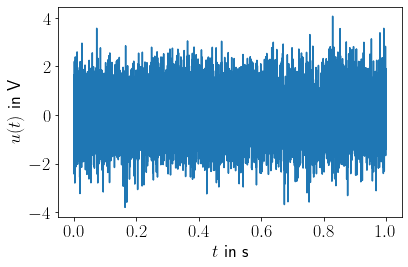

Siehe Abbildung §\ref{fig_noise1b}§


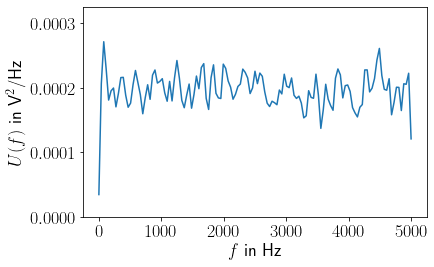

In [380]:
import scipy as sc
import scipy.signal
np.random.seed(123) #!
# 1s "verrauschtes Messignal" mit 10kHz Abtastung
N = int(1e4)
tt = np.linspace(0, 1, N)
Ts = tt[1] - tt[0] # Abtastzeit
uu = np.random.normal(0, 1, size=N)

plt.plot(tt, uu)
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
show_book("noise1a", printflag=False) #!

# Leistungsdichtespektrum bestimmen
ff, UU = sc.signal.welch(uu, fs=1/Ts)
plt.plot(ff, UU)

plt.ylim(0, max(XX)*1.2) #!
plt.xlabel("$f$ in Hz") #!
plt.ylabel("$U(f)$ in V${}^2$/Hz") #!
show_book("noise1b") #!

`end noise1`

In [74]:
Pxx_spec.max()

0.001859068308982754

In [68]:
plt.rcParams.update(double_plt_rcParams)
plt.rcParams['figure.subplot.right'] = .97

`begin noise2a`

Siehe Abbildung §\ref{fig_noise2a}§ (links)


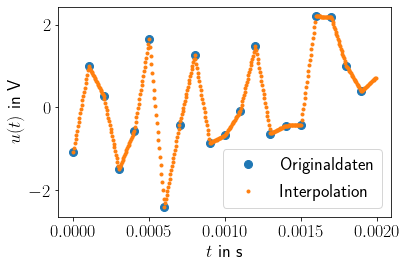

In [75]:
# Abtastrate durch lineare Interplolation erhöhen um Faktor K
from scipy import interpolate
K = 20
N2 = N*K
tt2 = np.linspace(0, 1, N2)

# Interpolationsfunktion bestimmen
ifnc = interpolate.interp1d(tt, uu, kind="linear")

# Interpolation durch Funktionsauswertung durchführen
uu2 = ifnc(tt2)

idx = 20
plt.plot(tt[:idx], uu[:idx], "o", ms=8, label="Originaldaten")
plt.plot(tt2[:idx*K], uu2[:idx*K], ".", label="Interpolation")
plt.legend() #!
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
show_book("noise2a", txt=" (links)") #!

`end noise2a`

In [80]:
plt.rcParams['figure.subplot.left'] = .23 #!

`begin noise2b`

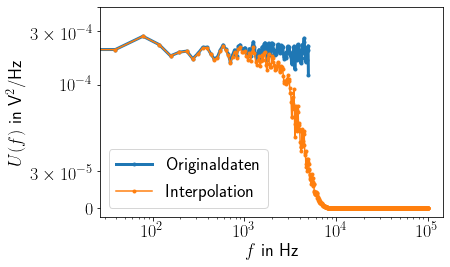

Siehe Abbildung §\ref{fig_noise2a}§ (rechts)


In [383]:
# Leistungsdichtespektrum des interpolierten Signals
ff2, UU2 = sc.signal.welch(uu2, fs=K/Ts, nperseg=256*K)
plt.loglog(ff, UU, '.-', lw=3, label="Originaldaten")
plt.loglog(ff2, UU2, '.-', label="Interpolation")
plt.yscale("symlog", linthresh=1e-4)
plt.yticks([0, 3e-5, 1e-4, 3e-4, 5e-4]) #!
plt.legend() #!
plt.xlabel("$f$ in Hz") #!
plt.ylabel("$U(f)$ in V${}^2$/Hz") #!
show_book("noise2b", printflag=False) #!
print(r"Siehe Abbildung §\ref{fig_noise2a}§ (rechts)") #!

`end noise2b`

`begin filter1`

Siehe Abbildung §\ref{fig_filter1}§


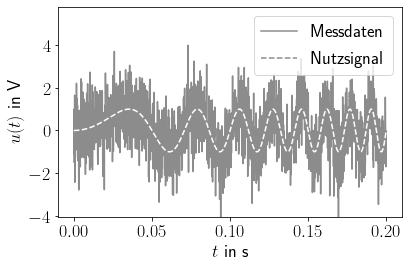

In [311]:
uu_nutz = np.sin(2*np.pi*200*tt*tt) # "Nutzdaten"
uu_total = uu_nutz + uu # Nutzdaten + bisheriges Rauschen
idx = int(tt.size*0.2) # Index von 0.2s
plt.plot(tt[:idx], uu_total[:idx], color="0.55")
plt.plot(tt[:idx], uu_nutz[:idx], "--", color="0.55") # nur für Legende #!
plt.plot(tt[:idx], uu_nutz[:idx], "--", color="1.0")
plt.legend(["Messdaten", "Nutzsignal"], loc="upper right") #!
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.ylim([-4.05, 5.8]) #!
show_book("filter1") #!

`end filter1`

In [339]:
!python3 ../../nbsnippets.py kapitel_labor.ipynb

Extracting snippets in kapitel_labor.ipynb
Extracting snippets: bytes1, bytes2, bytes3, bytes4, ser1, ser2, gpib1, gpib2, socket1, rocket1, noise1, noise2a, noise2b, filter1, filter2, filter3
Done


`begin filter2`

Siehe Abbildung §\ref{fig_filter2a}§ (links)


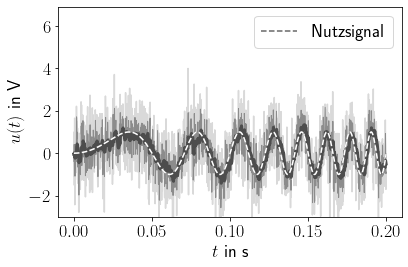

In [343]:
plt.plot(tt[:idx], uu_total[:idx], color="0.85") # Messdaten

num1, denom1 = sc.signal.butter(N=1, Wn=160, fs=1e3) # Filter-Entwurf
yy1 = sc.signal.lfilter(num1, denom1, uu_total) # Anwendung
plt.plot(tt[:idx], yy1[:idx], lw=1, color="0.55")

num2, denom2 = sc.signal.butter(N=1, Wn=16, fs=1e3)
yy2 = sc.signal.lfilter(num2, denom2, uu_total)
plt.plot(tt[:idx], yy2[:idx], lw=3, color="0.3")
# #!
plt.plot(tt[:idx], uu_nutz[:idx], "--", color="0.4", label="Nutzsignal") # nur für Legende #!
plt.plot(tt[:idx], uu_nutz[:idx], "--", color="1") #!
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right") #!
plt.ylim([-3, 6.9]) #!
show_book("filter2a", txt=" (links)") #!

`end filter2`

In [318]:
sc.signal.butter?

In [317]:
# Bild ins Buch, aber Code nicht.

Siehe Abbildung §\ref{fig_filter2b}§ (rechts)


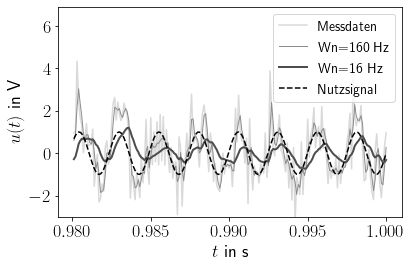

In [342]:
idx2 = -200

plt.plot(tt[idx2:], uu_total[idx2:], color="0.85", label="Messdaten")

plt.plot(tt[idx2:], yy1[idx2:], lw=1, color="0.55", label="Wn=160 Hz")

plt.plot(tt[idx2:], yy2[idx2:], lw=2, color="0.3", label="Wn=16 Hz")
plt.plot(tt[idx2:], uu_nutz[idx2:], "--", color="0", label="Nutzsignal")
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right", fontsize=14) #!
plt.ylim([-3, 6.9])
show_book("filter2b", txt=" (rechts)")

`begin filter3`

Siehe Abbildung §\ref{fig_filter3a}§ (links)


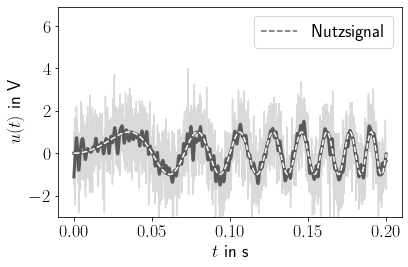

In [350]:
plt.plot(tt[:idx], uu_total[:idx], color="0.85") # Messdaten

# zeitdiskretes Filter 5. Ordnung
num1, denom1 = sc.signal.butter(5, Wn=50, fs=1e3)
yy1 = sc.signal.filtfilt(num1, denom1, uu_total)
plt.plot(tt[:idx], yy1[:idx], lw=3, color="0.35")
# #!
plt.plot(tt[:idx], uu_nutz[:idx], "--", color="0.4", label="Nutzsignal") # nur für Legende #!
plt.plot(tt[:idx], uu_nutz[:idx], "-", lw=3, color="0.35") # für bessere Sichtbarkeit der weißen Line #!
plt.plot(tt[:idx], uu_nutz[:idx], "--", color="1")
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right") #!
plt.ylim([-3, 6.9]) #!
show_book("filter3a", txt=" (links)") #!

`end filter3`

Siehe Abbildung §\ref{fig_filter3b}§ (rechts)


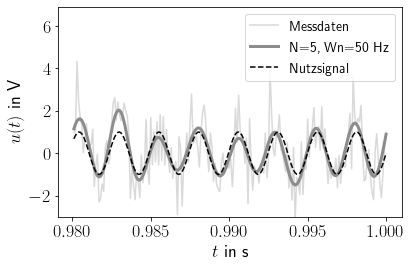

In [340]:
idx2 = -200

plt.plot(tt[idx2:], uu_total[idx2:], color="0.85", label="Messdaten")

plt.plot(tt[idx2:], yy1[idx2:], lw=3, color="0.55", label="N=5, Wn=50 Hz")

plt.plot(tt[idx2:], uu_nutz[idx2:], "--", color="0", label="Nutzsignal")
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!
plt.legend(loc="upper right", fontsize=14) #!
plt.ylim([-3, 6.9])
show_book("filter3b", txt=" (rechts)")

In [289]:
# Bild ins Buch, aber Code nicht.

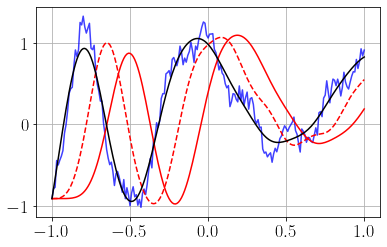

In [316]:
from scipy import signal

import matplotlib.pyplot as plt

t = np.linspace(-1, 1, 201)

x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +

     0.1*np.sin(2*np.pi*1.25*t + 1) +

     0.18*np.cos(2*np.pi*3.85*t))

xn = x + np.random.randn(len(t)) * 0.08

# Create an order 3 lowpass butterworth filter:


b, a = signal.butter(3, 0.05)

# Apply the filter to xn. Use lfilter_zi to choose the initial condition of the filter:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])

# Apply the filter again, to have a result filtered at an order the same as filtfilt:

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

# Use filtfilt to apply the filter

y = signal.filtfilt(b, a, xn)

# Plot the original signal and the various filtered versions:


plt.plot(t, xn, 'b', alpha=0.75)

plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')

# plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
#             'filtfilt'), loc='best')

plt.grid(True)


In [208]:
# Zeitkontinuierliches Butterworth-Filter mit Grenzfrequenz (Kreisfrequenz) von Omega=1kHz
# -> Polynom wie erwartet

r = num1, denom1 = sc.signal.butter(1, Wn=1e3, analog=True) # Filter-Entwurf
r

(array([1000.]), array([   1., 1000.]))

In [211]:
ctrl.sample_system(ctrl.TransferFunction(*r), 1e-3, method="bilinear")

TransferFunction(array([0.33333333, 0.33333333]), array([ 1.        , -0.33333333]), 0.001)

In [242]:
# Zeitdiskretes Butterworth-Filter 1. Ordnung.
# Noch nicht ganz klar, warum da nicht das gleiche rauskommt, wie wenn ich obiges Filter klassisch
# diskretisiere (Unterschied ca. Faktor 0.9272951)

In [241]:
sc.signal.butter(1, Wn=1e3/2/np.pi*0.9272951, analog=False, fs=1e3)

(array([0.3333333, 0.3333333]), array([ 1.       , -0.3333334]))

In [246]:
sc.signal.butter(1, Wn=1/np.pi*0.9272951, analog=False)

(array([0.3333333, 0.3333333]), array([ 1.       , -0.3333334]))

In [207]:
denom1/num1

array([3.14159265, 1.        ])

In [351]:
!python3 ../../nbsnippets.py kapitel_labor.ipynb

Extracting snippets in kapitel_labor.ipynb
Extracting snippets: bytes1, bytes2, bytes3, bytes4, ser1, ser2, gpib1, gpib2, socket1, rocket1, noise1, noise2a, noise2b, filter1, filter2, filter3
Done


In [177]:
import control as ctrl

In [179]:
G1 = ctrl.TransferFunction([1], [1e-3, 1])

TransferFunction(array([1]), array([0.001, 1.   ]))

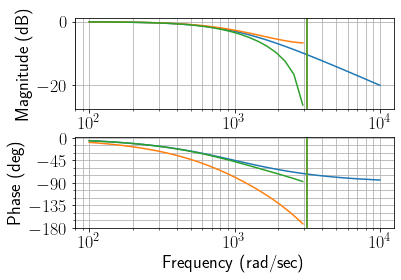

In [193]:
ctrl.bode_plot(G1)
ctrl.bode_plot(G1z)
ctrl.bode_plot(G2z)
pass

In [181]:
G1z = ctrl.sample_system?

In [182]:
G1z = ctrl.sample_system(G1, 1e-3)

TransferFunction(array([0.63212056]), array([ 1.        , -0.36787944]), 0.001)

In [183]:
ctrl.sample_system(ctrl.TransferFunction([1], [1, 0]), 1e-3)

TransferFunction(array([0.001]), array([ 1., -1.]), 0.001)

In [185]:
G1z.num

[[array([0.63212056])]]

In [186]:
np.exp(-1)

0.36787944117144233

In [188]:
import control.matlab

In [ ]:
ctrl.matlab.

In [192]:
G2z = ctrl.sample_system(G1, 1e-3, method="bilinear")

TransferFunction(array([0.33333333, 0.33333333]), array([ 1.        , -0.33333333]), 0.001)

Siehe Abbildung §\ref{fig_noise1}§


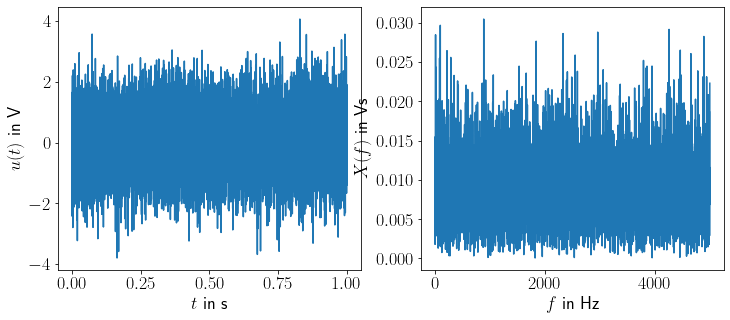

In [64]:
# old version
np.random.seed(123) #!
# 1s "verrauschtes Messignal" mit 10kHz Abtastung
N = int(1e4)
tt = np.linspace(0, 1, N)
Ts = tt[1] - tt[0] # Abtastzeit
uu = np.random.normal(0, 1e-0, size=N) + 1e-3*np.sin(30*tt)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)); #!
plt.sca(ax1)  # "set current axis" #!
plt.plot(tt, uu)
plt.xlabel("$t$ in s") #!
plt.ylabel("$u(t)$ in V") #!

plt.sca(ax2)  # "set current axis" #!
# Frequenzspektrum bestimmen
XXfft = np.abs(np.fft.fft(uu))[:int(N/2)]*Ts
# Frequenzachse
ff = np.arange(N/2)/(N*Ts)
plt.plot(ff, XXfft)
plt.xlabel("$f$ in Hz") #!
plt.ylabel("$X(f)$ in Vs") #!
show_book("noise1") #!

<ErrorbarContainer object of 3 artists>

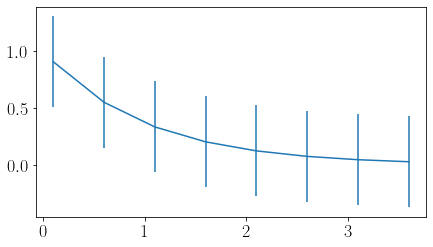

In [4]:


# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example variable error bar values
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

# First illustrate basic pyplot interface, using defaults where possible.
plt.figure()
plt.errorbar(x, y, xerr=0.0, yerr=0.4)

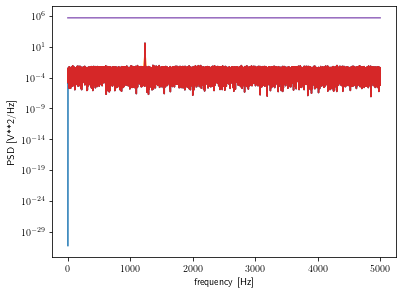

1.9999392414022163e-09

In [206]:
# based on examples in
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.periodogram.html

from scipy import signal
import matplotlib.pyplot as plt
np.random.seed(1234)


fs = 10e3
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 0.001 * fs / 2
time = np.arange(N) / fs
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)


# 'density' is the default scaling
f, Pxx_den = signal.periodogram(x, fs, window="boxcar",scaling="density")
XX = np.abs(np.fft.fft(x))[:len(x)//2]**2
ff = np.linspace(0, 1, len(XX))*f[-1]
f2, P2 = sc.signal.welch(x, fs, scaling="density", nperseg=1024 )
plt.semilogy(f, Pxx_den)
plt.semilogy(f2, P2)
plt.semilogy(f, f*0+np.mean(Pxx_den[25000:]))
plt.semilogy(ff, XX*q)
plt.semilogy(f, f*0+np.mean(XX[25000:]))
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()



q1, q2 = np.mean(Pxx_den[25000:]), np.mean(XX[25000:])
q = q1/q2


In [215]:
signal.csd??

In [209]:
len(x)**2*q

19.99939241402216

In [205]:
%matplotlib inline

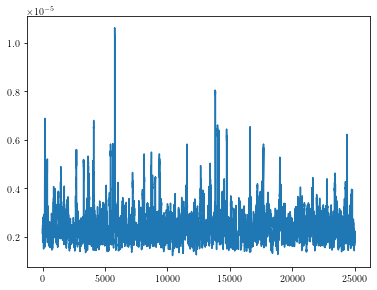

In [201]:
from scipy.ndimage.filters import uniform_filter1d
q = Pxx_den[1:] / XX
w = uniform_filter1d(q, size=30)
#plt.plot(q)
plt.plot(w[25000:])

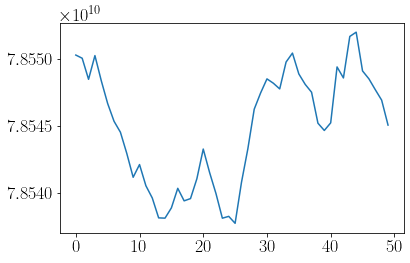

In [185]:
plt.plot(q[q.size//2-50:][:50])

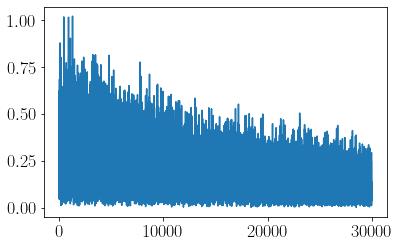

In [169]:
a = 20000
plt.plot(XX[a:]/f[1+a:])

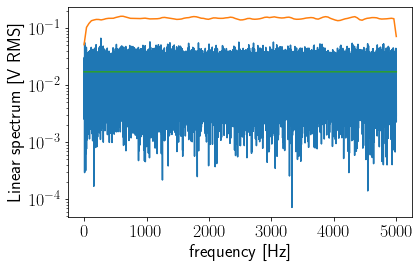

0.06680598336890614

In [130]:

sca = 'spectrum'
f, Pxx_spec = signal.periodogram(x, fs, 'flattop', scaling=sca)

f2, P2 = sc.signal.welch(x, fs, 'flattop', scaling=sca )

plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.semilogy(f2, np.sqrt(P2**2))
plt.semilogy(f, np.sqrt(Pxx_spec)*0+np.mean(np.sqrt(Pxx_spec)))
#plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()


np.sqrt(Pxx_spec.max())

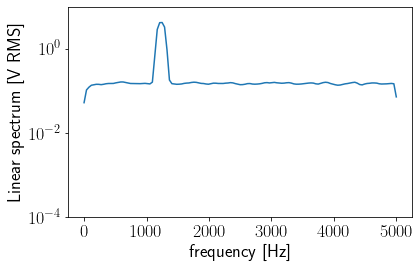

In [115]:
f2, P2 = sc.signal.welch(x, fs, 'flattop', scaling='spectrum' )
plt.semilogy(f2, np.sqrt(P2))
plt.ylim([1e-4, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()